In [1]:
# import libraries
import keras
from utils.preprocess import *
from config import *

In [2]:
# load dataset
dataset = load_unipen_dataset(no_cap)

# normalize dataset
def normalize(data, label):
    return tf.cast(data, tf.float32) / 255.0, label

if normalize_dataset:
    dataset = dataset.map(normalize)

dataset = dataset.shuffle(shuffle_buffer_size)

# split & filter dataset
train_size = int(train_prop * dataset.cardinality().numpy())
train_dataset = dataset.take(train_size).batch(batch_size)
test_dataset = dataset.skip(train_size).batch(batch_size)

In [3]:
# build model
model = keras.Sequential([
    keras.layers.Conv2D(24, (4, 4), input_shape=(64, 64, 1), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128),
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

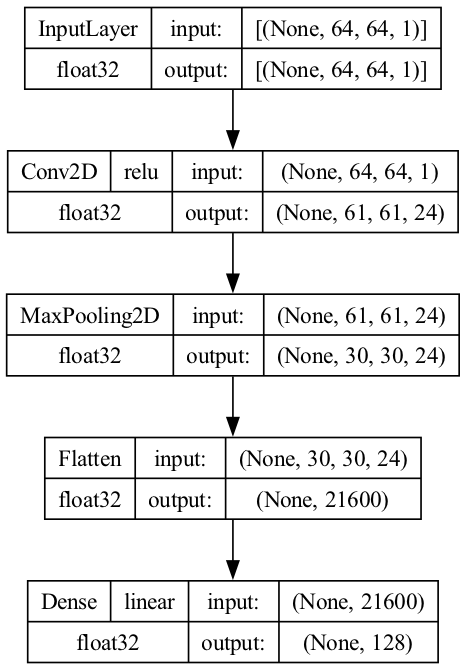

In [4]:
# plot model
target_model = "unipen_no_cap_model" if no_cap else "unipen_model"

keras.utils.plot_model(model, to_file=f"data/{target_model}.png", show_shapes=True, show_layer_names=False, dpi=120, show_dtype=True, show_layer_activations=True)

In [5]:
model.fit(train_dataset, epochs=epochs)

Epoch 1/10
1365/1365 [==============================] - 18s 13ms/step - loss: 3.3262 - accuracy: 0.5370
Epoch 2/10
1365/1365 [==============================] - 19s 14ms/step - loss: 0.8723 - accuracy: 0.7624
Epoch 3/10
1365/1365 [==============================] - 20s 15ms/step - loss: 0.5506 - accuracy: 0.8493
Epoch 4/10
1365/1365 [==============================] - 19s 14ms/step - loss: 0.3976 - accuracy: 0.8892
Epoch 5/10
1365/1365 [==============================] - 19s 14ms/step - loss: 0.3208 - accuracy: 0.9114
Epoch 6/10
1365/1365 [==============================] - 19s 14ms/step - loss: 0.2574 - accuracy: 0.9312
Epoch 7/10
1365/1365 [==============================] - 19s 13ms/step - loss: 0.2055 - accuracy: 0.9453
Epoch 8/10
1365/1365 [==============================] - 19s 14ms/step - loss: 0.1816 - accuracy: 0.9516
Epoch 9/10
1365/1365 [==============================] - 18s 13ms/step - loss: 0.1590 - accuracy: 0.9608
Epoch 10/10
1365/1365 [==============================] - 19s 14m

In [6]:
# evaluate model
test_loss, test_acc = model.evaluate(test_dataset)

print()
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

585/585 [==============================] - 3s 4ms/step - loss: 1.7207 - accuracy: 0.7739

Test loss: 1.720699667930603
Test accuracy: 0.7739246487617493


In [7]:
# save model
model.save(f"data/{target_model}.h5")

/Users/dogeon/Documents/code/py/unipen/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
